In [236]:
import numpy
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.image

### Funkcje

In [183]:
def wiPCA(X, n_components=2):
  x_m = X.mean(axis=0) #średni wektor wejściowy
  X = X - x_m #normalizacja
  cov = np.cov(X.T)
  eig_val, eig_vec = np.linalg.eig(cov) #wartości i wektory własne
  inds = np.argsort(eig_val)[::-1]
  eig_val = eig_val[inds]
  eig_vec = eig_vec[:, inds]
  X_r = np.dot(X, eig_vec[:, :n_components])
  return X_r, eig_vec, eig_val, x_m

def calculate_vectors(v, w, x_m):
  len = 3*np.sqrt(w)
  start = x_m + v
  vec = len * start
  return vec

def inv_PCA(X, v, n_components=2):
  return  X[:,:n_components].dot(v[:,:n_components].T)

### Zadanie 1.

In [253]:
X = np.dot(np.random.randn(2, 2), np.random.randn(2, 200)).T

[[ 3.94124092  0.42685816]
 [-2.36610712  0.73683811]]


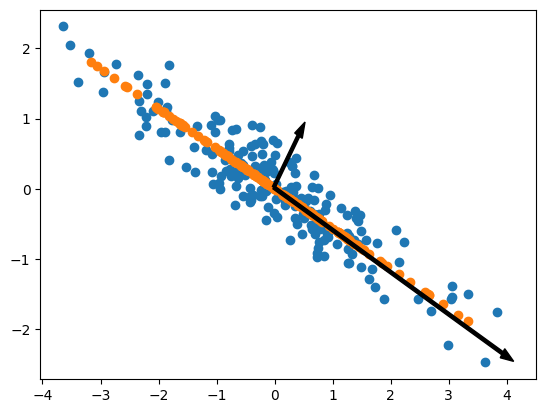

In [254]:
plt.scatter(X[:, 0], X[:, 1])
X_r, v, w, x_m = wiPCA(X, 1)
X_r = inv_PCA(X, v, 1)
plt.scatter(X_r[:, 0], X_r[:, 1])
vv = calculate_vectors(v, w, x_m)
print(vv)
v1 = vv[:, 0]
v2 = vv[:, 1]

plt.arrow(x=x_m[0],y=x_m[1],dx=v1[0],dy=v1[1], width=0.05, color='k')
plt.arrow(x=x_m[0],y=x_m[1],dx=v2[0],dy=v2[1], width=0.05, color='k')

### Zadanie 2.

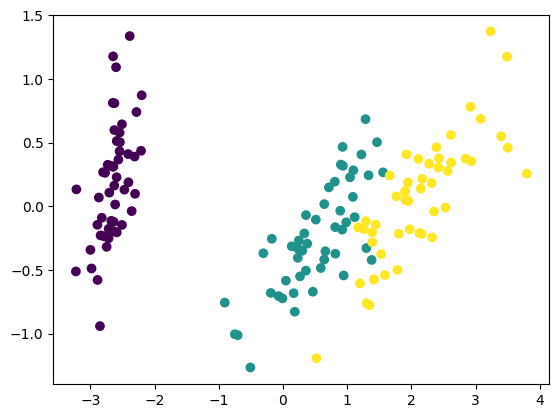

In [244]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_r, v, w, avg_x = wiPCA(X, 2)
scat = plt.scatter(X_r[:, 0], -X_r[:, 1], c=y)


### Zadanie 3.

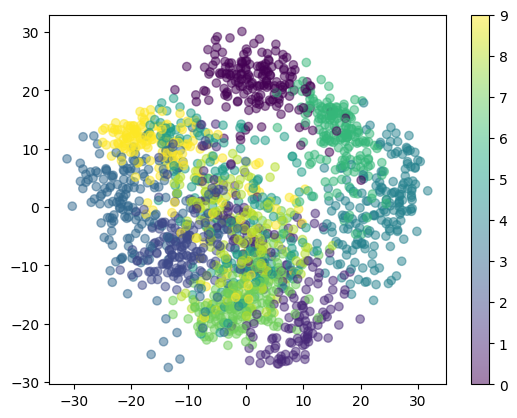

In [245]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

X_r, v, w, x_m = wiPCA(X, 2)
plt.scatter(-X_r[:, 0], -X_r[:, 1], c=y, alpha=0.5)
plt.colorbar()



Text(0.5, 1.0, 'Krzywa wariancji dla rosnącej liczby składowych głównych')

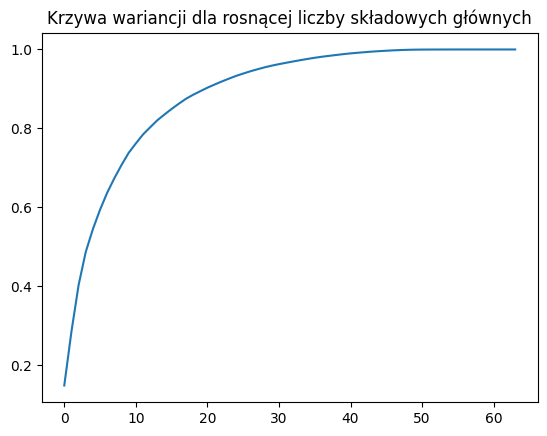

In [246]:
var = w/np.sum(w)
var = np.cumsum(var)
var = np.array(var)
plt.plot(np.arange(var.size), var)
plt.title("Krzywa wariancji dla rosnącej liczby składowych głównych")

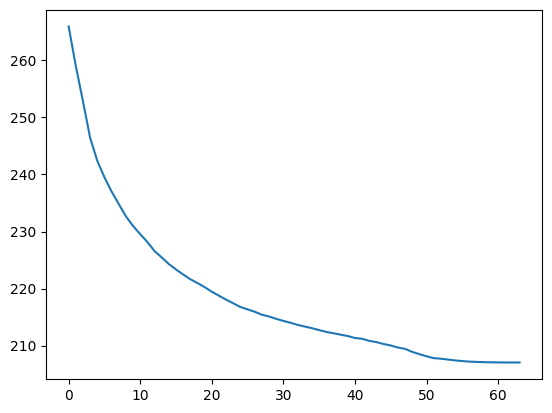

In [247]:
rec_loss = []
ind = []
for i in range(X.shape[1]):
  X_r, v, w, x_m = wiPCA(X, i)
  X_r = inv_PCA(X_r, v, i)
  loss = np.mean(np.sqrt(np.sum(np.square(X_r - X), axis=0)))
  rec_loss.append(loss)
  ind.append(i)
plt.plot(ind, rec_loss)
